# Cluster Analysis of Toronto City's Neighbourhoods

### Imports

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Read and explore the data

In [2]:
df = pd.read_csv('complete_locations.csv')
df.rename(columns = {'Neighbourhood': 'Neighborhood'}, inplace = True)

In [3]:
df.head()

Unnamed: 0 Postcode      Borough    Neighborhood   Latitude  Longitude
0           0      M1B  Scarborough           Rouge  43.806686 -79.194353
1           1      M1B  Scarborough         Malvern  43.806686 -79.194353
2           2      M1C  Scarborough  Highland Creek  43.784535 -79.160497
3           3      M1C  Scarborough      Port Union  43.784535 -79.160497
4           4      M1C  Scarborough      Rouge Hill  43.784535 -79.160497

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 6 columns):
Unnamed: 0      211 non-null int64
Postcode        211 non-null object
Borough         211 non-null object
Neighborhood    211 non-null object
Latitude        211 non-null float64
Longitude       211 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 10.0+ KB


In [5]:
df.drop(columns = ['Unnamed: 0', 'Postcode'], inplace = True)

In [6]:
df.isnull().sum()

Borough         0
Neighborhood    0
Latitude        0
Longitude       0
dtype: int64

### Get latitudes and longitudes of Toronto

In [7]:
address = 'Toronto, ON'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Toronto are {}, {}.'.format(latitude, longitude))

C:\Users\bauer\Anaconda3\envs\full_env\lib\site-packages\geopy\geocoders\osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinates of Toronto are 43.653963, -79.387207.


### Create a map of Toronto with its neighbourhoods

In [8]:
toronto_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(toronto_map)  
    
toronto_map

KeyError: 'Neighbourhood'

### Explore the Neighborhoods with Foursquare data

##### Define Foursquare credentials and version

In [14]:
CLIENT_ID = 'XNMD2E4XZXZ4BIHWUA24BQ2HMP1A25MFIAT5GXITZIWMA0T4' # your Foursquare ID
CLIENT_SECRET = '25KDYDWFLH2WIC0CXUSOAGGGME5A1MKFVC21V0G2USNYUAKJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XNMD2E4XZXZ4BIHWUA24BQ2HMP1A25MFIAT5GXITZIWMA0T4
CLIENT_SECRET:25KDYDWFLH2WIC0CXUSOAGGGME5A1MKFVC21V0G2USNYUAKJ


### Get the first Neighborhood's name

In [11]:
df.loc[0, 'Neighborhood']

'Rouge'

Now let's get the latitude and longitude of this neighborhood

In [12]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Rouge are 43.806686299999996, -79.19435340000001.


### Get the top 100 venues in Rouge in a radius of 500 metters

In [15]:
LIMIT= 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [16]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ba6a23a4434b92775ae6e3d'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Malvern',
  'headerFullLocation': 'Malvern, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 1,
  'suggestedBounds': {'ne': {'lat': 43.8111863045, 'lng': -79.18812958073042},
   'sw': {'lat': 43.80218629549999, 'lng': -79.2005772192696}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bb6b9446edc76b0d771311c',
       'name': "Wendy's",
       'location': {'crossStreet': 'Morningside & Sheppard',
        'lat': 43.80744841934756,
        'lng': -79.19905558052072,
        'labeledLatLngs': [{'label': 'display'

In [17]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Convert Json into a pandas dataframe

In [18]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name            categories        lat        lng
0  Wendy's  Fast Food Restaurant  43.807448 -79.199056

In [19]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

1 venues were returned by Foursquare.


### Now we are going to create a function that repeats all the above process for all the neighborhoods in Toronto, so we can explore these neighborhoods in more depth

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Run the above function and create a dataframe containing all the venues in Toronto for each of the neighborhoods

In [21]:
toronto_venues = getNearbyVenues(names= df['Neighborhood'],
                                   latitudes= df['Latitude'],
                                   longitudes= df['Longitude']
                                  )


Rouge
Malvern
Highland Creek
Port Union
Rouge Hill
Guildwood]]
Morningside
West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park
Ionview
East Birchmount Park
Clairlea
Golden Mile
Oakridge
Cliffcrest
Cliffside
Scarborough Village West
Cliffside West
Birch Cliff
Dorset Park
Scarborough Town Centre
Wexford Heights
Maryvale
Wexford
Agincourt
Tam O'Shanter
Sullivan
Clarks Corners
Steeles East
Milliken
L'Amoreaux East
Agincourt North
L'Amoreaux West
Steeles West
Upper Rouge
Hillcrest Village
Fairview
Oriole
Henry Farm
Bayview Village
York Mills
Silver Hills
Newtonbrook
Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park
Don Mills South
Wilson Heights
Bathurst Manor
Downsview North
Northwood Park
York University
Downsview East
CFB Toronto
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Parkview Hill
Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West
Riverdale
The Be

### Check the size of our new df

In [22]:
print(toronto_venues.shape)
toronto_venues.head()

(4414, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0           Rouge              43.806686              -79.194353   
1         Malvern              43.806686              -79.194353   
2  Highland Creek              43.784535              -79.160497   
3  Highland Creek              43.784535              -79.160497   
4      Port Union              43.784535              -79.160497   

                       Venue  Venue Latitude  Venue Longitude  \
0                    Wendy's       43.807448       -79.199056   
1                    Wendy's       43.807448       -79.199056   
2      Royal Canadian Legion       43.782533       -79.163085   
3  Affordable Toronto Movers       43.787919       -79.162977   
4      Royal Canadian Legion       43.782533       -79.163085   

         Venue Category  
0  Fast Food Restaurant  
1  Fast Food Restaurant  
2                   Bar  
3         Moving Target  
4                   Bar

### How many venues are there by neighborhood?

In [23]:
toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                              
Adelaide                                                            100   
Agincourt                                                             4   
Agincourt North                                                       3   
Albion Gardens                                                       10   
Alderwood                                                             9   
Bathurst Manor                                                       19   
Bathurst Quay                                                        14   
Bayview Village                                                       4   
Beaumond Heights                                                     10   
Bedford Park                                                         26   
Berczy Park                                                          56   
Birch Cliff                                                           4   
Bloordale Gardens                                                     7   
Brockton                                                             22   
Business reply mail Processing Centre969 Eastern                     15   
CFB Toronto                                                           4   
CN Tower                                                             14   
Cabbagetown                                                          45   
Caledonia-Fairbanks]]                                                 6   
Canada Post Gateway Processing Centre                                11   
Cedarbrae                                                             7   
Central Bay Street                                                   88   
Chinatown                                                           100   
Christie                                                             16   
Church and Wellesley                                                 86   
Clairlea                                                              8   
Clarks Corners                                                       10   
Cliffcrest                                                            4   
Cliffside                                                             4   
Cliffside West                                                        4   
Cloverdale                                                            1   
Commerce Court                                                      100   
Davisville                                                           36   
Davisville North                                                      7   
Deer Park                                                            14   
Del Ray                                                               5   
Design Exchange                                                     100   
Don Mills North                                                       6   
Don Mills South                                                      21   
Dorset Park                                                           8   
Dovercourt Village                                                   18   
Downsview Central                                                     4   
Downsview East                                                        4   
Downsview North                                                      19   
Downsview Northwest                                                   5   
Downsview West                                                        4   
Dufferin                                                             18   
East Birchmount Park                                                  6   
East Toronto                                                          3   
Emery                                                                 2   
Eringate                                                              7   
Exhibition Place                                                     22   


### Let's now analyze our neighborhoods

In [24]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
toronto_onehot = toronto_onehot[['Neighborhood',
 'Accessories Store',
 'Adult Boutique',
 'Afghan Restaurant',
 'Airport',
 'Airport Food Court',
 'Airport Gate',
 'Airport Lounge',
 'Airport Service',
 'Airport Terminal',
 'American Restaurant',
 'Antique Shop',
 'Aquarium',
 'Arepa Restaurant',
 'Art Gallery',
 'Art Museum',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Auto Garage',
 'Auto Workshop',
 'BBQ Joint',
 'Baby Store',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Baseball Stadium',
 'Basketball Court',
 'Basketball Stadium',
 'Beach',
 'Beer Bar',
 'Beer Store',
 'Belgian Restaurant',
 'Bike Shop',
 'Bistro',
 'Boat or Ferry',
 'Bookstore',
 'Boutique',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Bridal Shop',
 'Bubble Tea Shop',
 'Building',
 'Burger Joint',
 'Burrito Place',
 'Bus Line',
 'Bus Station',
 'Bus Stop',
 'Business Service',
 'Butcher',
 'Café',
 'Cajun / Creole Restaurant',
 'Candy Store',
 'Caribbean Restaurant',
 'Check Cashing Service',
 'Cheese Shop',
 'Chinese Restaurant',
 'Chocolate Shop',
 'Church',
 'Climbing Gym',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'College Arts Building',
 'College Gym',
 'College Rec Center',
 'College Stadium',
 'Comfort Food Restaurant',
 'Comic Shop',
 'Concert Hall',
 'Construction & Landscaping',
 'Convenience Store',
 'Cosmetics Shop',
 'Coworking Space',
 'Creperie',
 'Cuban Restaurant',
 'Cupcake Shop',
 'Curling Ice',
 'Dance Studio',
 'Deli / Bodega',
 'Department Store',
 'Dessert Shop',
 'Dim Sum Restaurant',
 'Diner',
 'Discount Store',
 'Dog Run',
 'Doner Restaurant',
 'Donut Shop',
 'Drugstore',
 'Dumpling Restaurant',
 'Eastern European Restaurant',
 'Electronics Store',
 'Empanada Restaurant',
 'Ethiopian Restaurant',
 'Event Space',
 'Falafel Restaurant',
 'Farmers Market',
 'Fast Food Restaurant',
 'Field',
 'Filipino Restaurant',
 'Fish & Chips Shop',
 'Fish Market',
 'Flea Market',
 'Flower Shop',
 'Food',
 'Food & Drink Shop',
 'Food Court',
 'Food Truck',
 'Fountain',
 'Fraternity House',
 'French Restaurant',
 'Fried Chicken Joint',
 'Frozen Yogurt Shop',
 'Fruit & Vegetable Store',
 'Furniture / Home Store',
 'Gaming Cafe',
 'Garden',
 'Garden Center',
 'Gastropub',
 'Gay Bar',
 'General Entertainment',
 'General Travel',
 'German Restaurant',
 'Gift Shop',
 'Gluten-free Restaurant',
 'Golf Course',
 'Gourmet Shop',
 'Greek Restaurant',
 'Grocery Store',
 'Gym',
 'Gym / Fitness Center',
 'Hakka Restaurant',
 'Harbor / Marina',
 'Hardware Store',
 'Hawaiian Restaurant',
 'Health & Beauty Service',
 'Health Food Store',
 'Historic Site',
 'History Museum',
 'Hobby Shop',
 'Hockey Arena',
 'Home Service',
 'Hookah Bar',
 'Hostel',
 'Hotel',
 'Hotel Bar',
 'Hotpot Restaurant',
 'Ice Cream Shop',
 'Indian Restaurant',
 'Indie Movie Theater',
 'Indonesian Restaurant',
 'Intersection',
 'Irish Pub',
 'Italian Restaurant',
 'Japanese Restaurant',
 'Jazz Club',
 'Jewelry Store',
 'Jewish Restaurant',
 'Juice Bar',
 'Korean Restaurant',
 'Lake',
 'Latin American Restaurant',
 'Light Rail Station',
 'Lingerie Store',
 'Liquor Store',
 'Lounge',
 'Mac & Cheese Joint',
 'Malay Restaurant',
 'Market',
 'Martial Arts Dojo',
 'Massage Studio',
 'Medical Center',
 'Mediterranean Restaurant',
 "Men's Store",
 'Metro Station',
 'Mexican Restaurant',
 'Middle Eastern Restaurant',
 'Miscellaneous Shop',
 'Mobile Phone Shop',
 'Modern European Restaurant',
 'Molecular Gastronomy Restaurant',
 'Monument / Landmark',
 'Motel',
 'Movie Theater',
 'Moving Target',
 'Museum',
 'Music Venue',
 'New American Restaurant',
 'Nightclub',
 'Noodle House',
 'Office',
 'Opera House',
 'Optical Shop',
 'Organic Grocery',
 'Park',
 'Performing Arts Venue',
 'Persian Restaurant',
 'Pet Store',
 'Pharmacy',
 'Piano Bar',
 'Pizza Place',
 'Plane',
 'Playground',
 'Plaza',
 'Pool',
 'Portuguese Restaurant',
 'Poutine Place',
 'Pub',
 'Ramen Restaurant',
 'Record Shop',
 'Recording Studio',
 'Rental Car Location',
 'Restaurant',
 'River',
 'Rock Climbing Spot',
 'Sake Bar',
 'Salad Place',
 'Salon / Barbershop',
 'Sandwich Place',
 'Scenic Lookout',
 'Sculpture Garden',
 'Seafood Restaurant',
 'Shoe Store',
 'Shopping Mall',
 'Skate Park',
 'Skating Rink',
 'Smoke Shop',
 'Smoothie Shop',
 'Snack Place',
 'Soup Place',
 'Southern / Soul Food Restaurant',
 'Spa',
 'Speakeasy',
 'Sporting Goods Shop',
 'Sports Bar',
 'Stadium',
 'Stationery Store',
 'Steakhouse',
 'Strip Club',
 'Supermarket',
 'Supplement Shop',
 'Sushi Restaurant',
 'Swim School',
 'Taco Place',
 'Tailor Shop',
 'Taiwanese Restaurant',
 'Tanning Salon',
 'Tapas Restaurant',
 'Tea Room',
 'Tennis Court',
 'Thai Restaurant',
 'Theater',
 'Toy / Game Store',
 'Trail',
 'Train Station',
 'Turkish Restaurant',
 'Vegetarian / Vegan Restaurant',
 'Video Game Store',
 'Video Store',
 'Vietnamese Restaurant',
 'Whisky Bar',
 'Wine Bar',
 'Wings Joint',
 "Women's Store",
 'Yoga Studio']]
toronto_onehot.head()

Neighborhood  Accessories Store  Adult Boutique  Afghan Restaurant  \
0           Rouge                  0               0                  0   
1         Malvern                  0               0                  0   
2  Highland Creek                  0               0                  0   
3  Highland Creek                  0               0                  0   
4      Port Union                  0               0                  0   

   Airport  Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0        0                   0             0               0                0   
1        0                   0             0               0                0   
2        0                   0             0               0                0   
3        0                   0             0               0                0   
4        0                   0             0               0                0   

   Airport Terminal  American Restaurant  Antique Shop  Aquarium  \
0                 0                    0             0         0   
1                 0                    0             0         0   
2                 0                    0             0         0   
3                 0                    0             0         0   
4                 0                    0             0         0   

   Arepa Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                 0            0           0                    0   
1                 0            0           0                    0   
2                 0            0           0                    0   
3                 0            0           0                    0   
4                 0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Auto Garage  Auto Workshop  \
0                 0                   0            0              0   
1                 0                   0            0              0   
2                 0                   0            0              0   
3                 0                   0            0              0   
4                 0                   0            0              0   

   BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0          0           0           0       0     0    0               0   
1          0           0           0       0     0    0               0   
2          0           0           0       0     0    1               0   
3          0           0           0       0     0    0               0   
4          0           0           0       0     0    1               0   

   Baseball Stadium  Basketball Court  Basketball Stadium  Beach  Beer Bar  \
0                 0                 0                   0      0         0   
1                 0                 0                   0      0         0   
2                 0                 0                   0      0         0   
3                 0                 0                   0      0         0   
4                 0                 0                   0      0         0   

   Beer Store  Belgian Restaurant  Bike Shop  Bistro  Boat or Ferry  \
0           0                   0          0       0              0   
1           0                   0          0       0              0   
2           0                   0          0       0              0   
3           0                   0          0       0              0   
4           0                   0          0       0              0   

   Bookstore  Boutique  Brazilian Restaurant  Breakfast Spot  Brewery  \
0          0         0                     0               0        0   
1          0         0                     0               0        0   
2          0         0                     0               0        0   
3          0         0                     0               0        0   
4          0         0                     0               0        0   

   Bridal Shop  Bubble Tea Sho

In [25]:
toronto_onehot.shape

(4414, 268)

### Group by neighborhood and get the mean ocurrence of each venue category

In [26]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

Neighborhood  Accessories Store  \
0                                            Adelaide           0.010000   
1                                           Agincourt           0.000000   
2                                     Agincourt North           0.000000   
3                                      Albion Gardens           0.000000   
4                                           Alderwood           0.000000   
5                                      Bathurst Manor           0.000000   
6                                       Bathurst Quay           0.000000   
7                                     Bayview Village           0.000000   
8                                    Beaumond Heights           0.000000   
9                                        Bedford Park           0.000000   
10                                        Berczy Park           0.000000   
11                                        Birch Cliff           0.000000   
12                                  Bloordale Gardens           0.000000   
13                                           Brockton           0.000000   
14   Business reply mail Processing Centre969 Eastern           0.000000   
15                                        CFB Toronto           0.000000   
16                                           CN Tower           0.000000   
17                                        Cabbagetown           0.000000   
18                              Caledonia-Fairbanks]]           0.000000   
19              Canada Post Gateway Processing Centre           0.000000   
20                                          Cedarbrae           0.000000   
21                                 Central Bay Street           0.000000   
22                                          Chinatown           0.000000   
23                                           Christie           0.000000   
24                               Church and Wellesley           0.000000   
25                                           Clairlea           0.000000   
26                                     Clarks Corners           0.000000   
27                                         Cliffcrest           0.000000   
28                                          Cliffside           0.000000   
29                                     Cliffside West           0.000000   
30                                         Cloverdale           0.000000   
31                                     Commerce Court           0.000000   
32                                         Davisville           0.000000   
33                                   Davisville North           0.000000   
34                                          Deer Park           0.000000   
35                                            Del Ray           0.000000   
36                                    Design Exchange           0.000000   
37                                    Don Mills North           0.000000   
38                                    Don Mills South           0.000000   
39                                        Dorset Park           0.000000   
40                                 Dovercourt Village           0.000000   
41                                  Downsview Central           0.000000   
42                                     Downsview East           0.000000   
43                                    Downsview North           0.000000   
44                                Downsview Northwest           0.000000   
45                                     Downsview West           0.000000   
46                                           Dufferin           0.000000   
47                               East Birchmount Park           0.000000   
48                                       East Toronto           0.000000   
49                                              Emery           0.000000   
50                                           Eringate           0.000000   
51                                   Exhibition Place           0.000000   
52           

In [27]:
toronto_grouped.shape

(206, 268)

### 5 top venues by neighborhood

In [124]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide----
                 venue  freq
0          Coffee Shop  0.07
1                 Café  0.05
2  American Restaurant  0.04
3           Steakhouse  0.04
4      Thai Restaurant  0.04


----Agincourt----
            venue  freq
0          Lounge  0.25
1  Sandwich Place  0.25
2  Breakfast Spot  0.25
3    Skating Rink  0.25
4   Metro Station  0.00


----Agincourt North----
               venue  freq
0        Coffee Shop  0.33
1         Playground  0.33
2               Park  0.33
3  Accessories Store  0.00
4      Metro Station  0.00


----Albion Gardens----
                  venue  freq
0         Grocery Store   0.2
1  Fast Food Restaurant   0.1
2   Fried Chicken Joint   0.1
3        Sandwich Place   0.1
4           Coffee Shop   0.1


----Alderwood----
                venue  freq
0         Pizza Place  0.22
1                 Pub  0.11
2      Sandwich Place  0.11
3  Athletics & Sports  0.11
4                Bank  0.11


----Bathurst Manor----
            venue  freq
0     Coffee Sh

                             venue  freq
0                     Intersection  0.33
1                             Park  0.33
2                Convenience Store  0.33
3                    Metro Station  0.00
4  Molecular Gastronomy Restaurant  0.00


----Emery----
                    venue  freq
0          Baseball Field   0.5
1  Furniture / Home Store   0.5
2                  Market   0.0
3       Martial Arts Dojo   0.0
4          Massage Studio   0.0


----Eringate----
          venue  freq
0   Pizza Place  0.14
1          Park  0.14
2    Beer Store  0.14
3  Liquor Store  0.14
4          Café  0.14


----Exhibition Place----
                venue  freq
0         Coffee Shop  0.14
1      Breakfast Spot  0.09
2                Café  0.09
3       Burrito Place  0.05
4  Falafel Restaurant  0.05


----Fairview----
                  venue  freq
0        Clothing Store  0.12
1  Fast Food Restaurant  0.07
2           Coffee Shop  0.06
3            Shoe Store  0.06
4                Bakery  0.04



                    venue  freq
0  Furniture / Home Store  0.25
1          Clothing Store  0.25
2             Event Space  0.06
3                Boutique  0.06
4        Fraternity House  0.06


----Lawrence Manor East----
                  venue  freq
0    Italian Restaurant  0.08
1           Pizza Place  0.08
2      Sushi Restaurant  0.08
3  Fast Food Restaurant  0.08
4           Coffee Shop  0.08


----Lawrence Park----
                venue  freq
0  Dim Sum Restaurant  0.25
1                Park  0.25
2            Bus Line  0.25
3         Swim School  0.25
4   Accessories Store  0.00


----Leaside----
                    venue  freq
0     Sporting Goods Shop  0.09
1             Coffee Shop  0.09
2            Burger Joint  0.06
3        Sushi Restaurant  0.06
4  Furniture / Home Store  0.06


----Little Portugal----
              venue  freq
0               Bar  0.12
1              Café  0.06
2       Coffee Shop  0.05
3        Restaurant  0.05
4  Asian Restaurant  0.03


----Long Bra

                venue  freq
0         Coffee Shop  0.10
1                Café  0.07
2    Sushi Restaurant  0.05
3         Pizza Place  0.05
4  Italian Restaurant  0.05


----Runnymede]]----
               venue  freq
0        Pizza Place  0.25
1      Grocery Store  0.25
2  Convenience Store  0.25
3             Bakery  0.25
4  Accessories Store  0.00


----Ryerson----
                 venue  freq
0          Coffee Shop  0.08
1       Clothing Store  0.07
2       Cosmetics Shop  0.04
3                 Café  0.04
4  Japanese Restaurant  0.03


----Scarborough Town Centre----
                   venue  freq
0      Indian Restaurant  0.25
1      Fish & Chips Shop  0.12
2  Vietnamese Restaurant  0.12
3     Chinese Restaurant  0.12
4                Brewery  0.12


----Scarborough Village----
                             venue  freq
0          Health & Beauty Service   0.5
1                       Playground   0.5
2                Accessories Store   0.0
3                    Metro Station   0.0
4

               venue  freq
0  Accessories Store  0.12
1     Sandwich Place  0.12
2     Breakfast Spot  0.12
3         Smoke Shop  0.12
4      Shopping Mall  0.12


----Wexford Heights----
                   venue  freq
0      Indian Restaurant  0.25
1      Fish & Chips Shop  0.12
2  Vietnamese Restaurant  0.12
3     Chinese Restaurant  0.12
4                Brewery  0.12


----Willowdale South----
              venue  freq
0        Restaurant  0.09
1  Ramen Restaurant  0.09
2    Sandwich Place  0.06
3       Pizza Place  0.06
4              Café  0.06


----Willowdale West----
           venue  freq
0    Pizza Place   0.2
1    Coffee Shop   0.2
2        Butcher   0.2
3  Grocery Store   0.2
4       Pharmacy   0.2


----Wilson Heights----
            venue  freq
0     Coffee Shop  0.11
1     Pizza Place  0.05
2  Ice Cream Shop  0.05
3   Shopping Mall  0.05
4            Park  0.05


----Woburn----
                        venue  freq
0                 Coffee Shop  0.67
1           Korean Re

### Function to sort the venues in descending order

In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Now let's put this into a new pandas df and show the top ten venues per neighborhood

In [29]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

Neighborhood  \
0                                            Adelaide   
1                                           Agincourt   
2                                     Agincourt North   
3                                      Albion Gardens   
4                                           Alderwood   
5                                      Bathurst Manor   
6                                       Bathurst Quay   
7                                     Bayview Village   
8                                    Beaumond Heights   
9                                        Bedford Park   
10                                        Berczy Park   
11                                        Birch Cliff   
12                                  Bloordale Gardens   
13                                           Brockton   
14   Business reply mail Processing Centre969 Eastern   
15                                        CFB Toronto   
16                                           CN Tower   
17                                        Cabbagetown   
18                              Caledonia-Fairbanks]]   
19              Canada Post Gateway Processing Centre   
20                                          Cedarbrae   
21                                 Central Bay Street   
22                                          Chinatown   
23                                           Christie   
24                               Church and Wellesley   
25                                           Clairlea   
26                                     Clarks Corners   
27                                         Cliffcrest   
28                                          Cliffside   
29                                     Cliffside West   
30                                         Cloverdale   
31                                     Commerce Court   
32                                         Davisville   
33                                   Davisville North   
34                                          Deer Park   
35                                            Del Ray   
36                                    Design Exchange   
37                                    Don Mills North   
38                                    Don Mills South   
39                                        Dorset Park   
40                                 Dovercourt Village   
41                                  Downsview Central   
42                                     Downsview East   
43                                    Downsview North   
44                                Downsview Northwest   
45                                     Downsview West   
46                                           Dufferin   
47                               East Birchmount Park   
48                                       East Toronto   
49                                              Emery   
50                                           Eringate   
51                                   Exhibition Place   
52                                           Fairview   
53                               First Canadian Place   
54                                    Flemingdon Park   
55                                  Forest Hill North   
56                                     Forest Hill SE   
57                                   Forest Hill West   
58                                    Garden District   
59                                          Glencairn   
60                                        Golden Mile   
61                                        Grange Park   
62                                        Guildwood]]   
63                                            Harbord   
64                                       Harbourfront   
65                                  Harbourfront East   
66                                  Harbourfront West   
67                                         Henry Farm   
68                                          High Park   
69                                     Highland Cre

# Get neighborhoods's clusters

### First, let's determine the optimal value of K for our dataset using the Elbow method

In [30]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

Sum_of_squared_distances = []
K = range(1, 40)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(toronto_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

### Plot and visualize optimal K

In [31]:
optimal_k= pd.DataFrame(data= Sum_of_squared_distances, columns = ['Sum_of_squared_distances'], index = K)
optimal_k.rename_axis('K', axis = 'columns', inplace = True)
#optimal_k

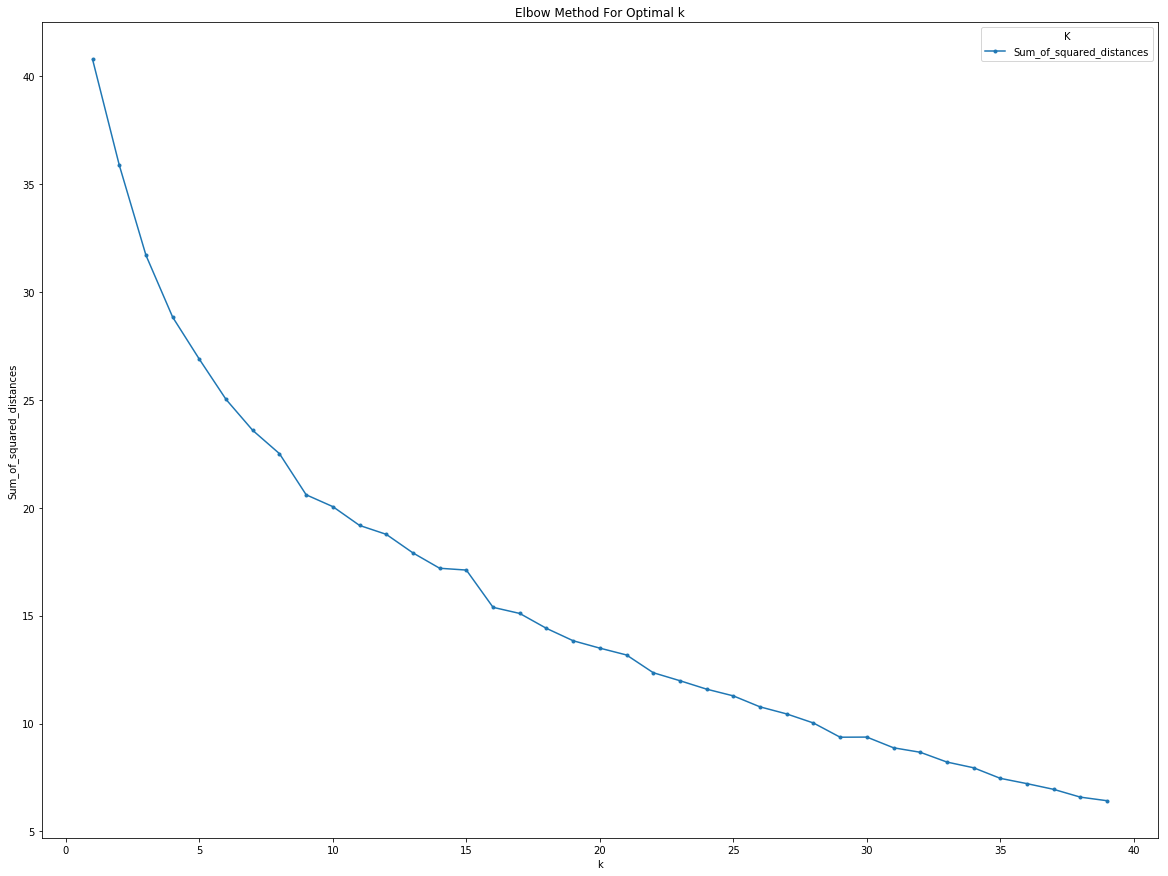

In [32]:
optimal_k.plot(kind = 'line', figsize = (20, 15), marker = '.')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

It seems that our best suitable K value is 15.

In [33]:
# set number of clusters
kclusters = 15

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([5, 5, 7, 9, 9, 9, 0, 5, 9, 9])

### Now let's put our cluster labels in our neighborhoods_venues_sorted df

First, we need to remove the rows in our original df for which the Foursquare call didn't return any venues

In [34]:
df['Neighborhood'] = neighborhoods_venues_sorted['Neighborhood']
print(df.shape)
df.isnull().sum()
df.dropna(how = 'any', axis = 0, inplace = True)
print(df.shape)
print(neighborhoods_venues_sorted.shape)

(211, 4)
(206, 4)
(206, 11)


### Now we are going to create a new df that contains the cluster labels as well as the top 10 venues per neighborhood

In [35]:
toronto_merged = df

# add clustering labels
toronto_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

print(toronto_merged.shape)
toronto_merged.head() # check the last columns!

(206, 15)


Borough     Neighborhood   Latitude  Longitude  Cluster Labels  \
0  Scarborough         Adelaide  43.806686 -79.194353               5   
1  Scarborough        Agincourt  43.806686 -79.194353               5   
2  Scarborough  Agincourt North  43.784535 -79.160497               7   
3  Scarborough   Albion Gardens  43.784535 -79.160497               9   
4  Scarborough        Alderwood  43.784535 -79.160497               9   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0           Coffee Shop                  Café       Thai Restaurant   
1                Lounge          Skating Rink        Breakfast Spot   
2           Coffee Shop                  Park            Playground   
3         Grocery Store   Fried Chicken Joint           Video Store   
4           Pizza Place    Athletics & Sports        Sandwich Place   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0            Steakhouse   American Restaurant          Burger Joint   
1        Sandwich Place            Donut Shop                 Diner   
2           Yoga Studio            Donut Shop    Dim Sum Restaurant   
3        Sandwich Place           Pizza Place            Beer Store   
4           Coffee Shop                   Gym          Dance Studio   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0        Clothing Store            Restaurant                   Gym   
1        Discount Store               Dog Run      Doner Restaurant   
2                 Diner        Discount Store               Dog Run   
3  Fast Food Restaurant              Pharmacy           Coffee Shop   
4                  Bank                   Pub                 Diner   

        10th Most Common Venue  
0                          Bar  
1          Dumpling Restaurant  
2             Doner Restaurant  
3  Eastern European Restaurant  
4               Discount Store

### Now, let's visualize the clusters

In [36]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Now we can examine our resulting clusters

#### Cluster one

In [37]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
6        Bathurst Quay        Airport Lounge      Airport Terminal   
16            CN Tower        Airport Lounge      Airport Terminal   
66   Harbourfront West        Airport Lounge      Airport Terminal   
79      Island airport        Airport Lounge      Airport Terminal   
86    King and Spadina        Airport Lounge      Airport Terminal   
132      Railway Lands        Airport Lounge      Airport Terminal   
155      South Niagara        Airport Lounge      Airport Terminal   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
6         Airport Service              Boutique                 Plane   
16        Airport Service              Boutique                 Plane   
66        Airport Service              Boutique                 Plane   
79        Airport Service              Boutique                 Plane   
86        Airport Service              Boutique                 Plane   
132       Airport Service              Boutique                 Plane   
155       Airport Service              Boutique                 Plane   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
6           Boat or Ferry      Sculpture Garden          Airport Gate   
16          Boat or Ferry      Sculpture Garden          Airport Gate   
66          Boat or Ferry      Sculpture Garden          Airport Gate   
79          Boat or Ferry      Sculpture Garden          Airport Gate   
86          Boat or Ferry      Sculpture Garden          Airport Gate   
132         Boat or Ferry      Sculpture Garden          Airport Gate   
155         Boat or Ferry      Sculpture Garden          Airport Gate   

    9th Most Common Venue 10th Most Common Venue  
6                 Airport        Harbor / Marina  
16                Airport        Harbor / Marina  
66                Airport        Harbor / Marina  
79                Airport        Harbor / Marina  
86                Airport        Harbor / Marina  
132               Airport        Harbor / Marina  
155               Airport        Harbor / Marina

#### Cluster two

In [38]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood 1st Most Common Venue          2nd Most Common Venue  \
22            Chinatown                  Café  Vegetarian / Vegan Restaurant   
40   Dovercourt Village           Supermarket                         Bakery   
46             Dufferin           Supermarket                         Bakery   
61          Grange Park                  Café  Vegetarian / Vegan Restaurant   
68            High Park                   Bar                           Café   
84    Kensington Market                  Café  Vegetarian / Vegan Restaurant   
98      Little Portugal                   Bar                           Café   
119           Northwest                   Bar                      Drugstore   
120      Northwood Park           Coffee Shop                           Café   
174  The Junction South                   Bar                           Café   
182             Trinity                   Bar                           Café   
203     York University           Coffee Shop                           Café   

     3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
22      Chinese Restaurant                Bakery                   Bar   
40                Bus Stop        Discount Store            Smoke Shop   
46                Bus Stop        Discount Store            Smoke Shop   
61      Chinese Restaurant                Bakery                   Bar   
68      Mexican Restaurant         Grocery Store                Bakery   
84      Chinese Restaurant                Bakery                   Bar   
98              Restaurant           Coffee Shop      Asian Restaurant   
119    Rental Car Location                 Diner        Discount Store   
120  Vietnamese Restaurant        Massage Studio                   Bar   
174     Mexican Restaurant         Grocery Store                Bakery   
182             Restaurant           Coffee Shop      Asian Restaurant   
203  Vietnamese Restaurant        Massage Studio                   Bar   

         6th Most Common Venue  7th Most Common Venue 8th Most Common Venue  \
22       Vietnamese Restaurant     Mexican Restaurant   Dumpling Restaurant   
40        Gym / Fitness Center                   Park          Liquor Store   
46        Gym / Fitness Center                   Park          Liquor Store   
61       Vietnamese Restaurant     Mexican Restaurant   Dumpling Restaurant   
68   Cajun / Creole Restaurant    Fried Chicken Joint    Italian Restaurant   
84       Vietnamese Restaurant     Mexican Restaurant   Dumpling Restaurant   
98                Cocktail Bar  Vietnamese Restaurant                Bakery   
119                    Dog Run       Doner Restaurant            Donut Shop   
120                Yoga Studio             Donut Shop                 Diner   
174  Cajun / Creole Restaurant    Fried Chicken Joint    Italian Restaurant   
182               Cocktail Bar  Vietnamese Restaurant                Bakery   
203                Yoga Studio             Donut Shop                 Diner   

    9th Most Common Venue  10th Most Common Venue  
22            Coffee Shop             Gaming Cafe  
40            Music Venue                Pharmacy  
46            Music Venue                Pharmacy  
61            Coffee Shop             Gaming Cafe  
68    Arts & Crafts Store  Furniture / Home Store  
84            Coffee Shop             Gaming Cafe  
98            Pizza Place       French Restaurant  
119           Yoga Studio            Dessert Shop  
120        Discount Store                 Dog Run  
174   Arts & Crafts Store  Furniture / Home Store  
182           Pizza Place       French Restaurant  
203        Discount Store                 Dog Run

#### Cluster three

In [39]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
151     Silver Hills                  Park           Yoga Studio   
192           Weston                  Park           Yoga Studio   
201       York Mills                  Park           Yoga Studio   
202  York Mills West                  Park                  Bank   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
151             Drugstore    Dim Sum Restaurant                 Diner   
192             Drugstore    Dim Sum Restaurant                 Diner   
201             Drugstore    Dim Sum Restaurant                 Diner   
202           Yoga Studio   Dumpling Restaurant        Discount Store   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
151        Discount Store               Dog Run      Doner Restaurant   
192        Discount Store               Dog Run      Doner Restaurant   
201        Discount Store               Dog Run      Doner Restaurant   
202               Dog Run      Doner Restaurant            Donut Shop   

    9th Most Common Venue       10th Most Common Venue  
151            Donut Shop          Dumpling Restaurant  
192            Donut Shop          Dumpling Restaurant  
201            Donut Shop          Dumpling Restaurant  
202             Drugstore  Eastern European Restaurant

#### Cluster four

In [40]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
30         Cloverdale                  Bank           Yoga Studio   
80          Islington                  Bank           Yoga Studio   
103      Martin Grove                  Bank           Yoga Studio   
131  Princess Gardens                  Bank           Yoga Studio   
189   West Deane Park                  Bank           Yoga Studio   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
30                  Diner        Discount Store               Dog Run   
80                  Diner        Discount Store               Dog Run   
103                 Diner        Discount Store               Dog Run   
131                 Diner        Discount Store               Dog Run   
189                 Diner        Discount Store               Dog Run   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
30       Doner Restaurant            Donut Shop             Drugstore   
80       Doner Restaurant            Donut Shop             Drugstore   
103      Doner Restaurant            Donut Shop             Drugstore   
131      Doner Restaurant            Donut Shop             Drugstore   
189      Doner Restaurant            Donut Shop             Drugstore   

    9th Most Common Venue 10th Most Common Venue  
30    Dumpling Restaurant   Fast Food Restaurant  
80    Dumpling Restaurant   Fast Food Restaurant  
103   Dumpling Restaurant   Fast Food Restaurant  
131   Dumpling Restaurant   Fast Food Restaurant  
189   Dumpling Restaurant   Fast Food Restaurant

#### Cluster five

In [41]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood   1st Most Common Venue 2nd Most Common Venue  \
41          Downsview Central              Food Truck          Home Service   
49                      Emery  Furniture / Home Store        Baseball Field   
71                 Humber Bay            Home Service        Baseball Field   
75                  Humberlea  Furniture / Home Store        Baseball Field   
87           King's Mill Park            Home Service        Baseball Field   
89   Kingsway Park South East            Home Service        Baseball Field   
107                 Mimico NE            Home Service        Baseball Field   
124            Old Mill South            Home Service        Baseball Field   
143     Royal York South East            Home Service        Baseball Field   
167                  Sunnylea            Home Service        Baseball Field   
176        The Queensway East            Home Service        Baseball Field   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
41         Baseball Field      Business Service           Yoga Studio   
49              Drugstore    Dim Sum Restaurant                 Diner   
71            Yoga Studio   Dumpling Restaurant        Discount Store   
75              Drugstore    Dim Sum Restaurant                 Diner   
87            Yoga Studio   Dumpling Restaurant        Discount Store   
89            Yoga Studio   Dumpling Restaurant        Discount Store   
107           Yoga Studio   Dumpling Restaurant        Discount Store   
124           Yoga Studio   Dumpling Restaurant        Discount Store   
143           Yoga Studio   Dumpling Restaurant        Discount Store   
167           Yoga Studio   Dumpling Restaurant        Discount Store   
176           Yoga Studio   Dumpling Restaurant        Discount Store   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
41             Donut Shop                 Diner        Discount Store   
49         Discount Store               Dog Run      Doner Restaurant   
71                Dog Run      Doner Restaurant            Donut Shop   
75         Discount Store               Dog Run      Doner Restaurant   
87                Dog Run      Doner Restaurant            Donut Shop   
89                Dog Run      Doner Restaurant            Donut Shop   
107               Dog Run      Doner Restaurant            Donut Shop   
124               Dog Run      Doner Restaurant            Donut Shop   
143               Dog Run      Doner Restaurant            Donut Shop   
167               Dog Run      Doner Restaurant            Donut Shop   
176               Dog Run      Doner Restaurant            Donut Shop   

    9th Most Common Venue       10th Most Common Venue  
41                Dog Run             Doner Restaurant  
49             Donut Shop                  Yoga Studio  
71              Drugstore  Eastern European Restaurant  
75             Donut Shop                  Yoga Studio  
87              Drugstore  Eastern European Restaurant  
89              Drugstore  Eastern European Restaurant  
107             Drugstore  Eastern European Restaurant  
124             Drugstore  Eastern European Restaurant  
143             Drugstore  Eastern European Restaurant  
167             Drugstore  Eastern European Restaurant  
176             Drugstore  Eastern European Restaurant

#### Cluster six

In [42]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood  \
0                                            Adelaide   
1                                           Agincourt   
7                                     Bayview Village   
10                                        Berczy Park   
11                                        Birch Cliff   
13                                           Brockton   
14   Business reply mail Processing Centre969 Eastern   
15                                        CFB Toronto   
17                                        Cabbagetown   
19              Canada Post Gateway Processing Centre   
20                                          Cedarbrae   
21                                 Central Bay Street   
23                                           Christie   
24                               Church and Wellesley   
25                                           Clairlea   
27                                         Cliffcrest   
28                                          Cliffside   
29                                     Cliffside West   
31                                     Commerce Court   
32                                         Davisville   
33                                   Davisville North   
36                                    Design Exchange   
37                                    Don Mills North   
38                                    Don Mills South   
39                                        Dorset Park   
42                                     Downsview East   
47                               East Birchmount Park   
51                                   Exhibition Place   
52                                           Fairview   
53                               First Canadian Place   
54                                    Flemingdon Park   
58                                    Garden District   
60                                        Golden Mile   
62                                        Guildwood]]   
63                                            Harbord   
64                                       Harbourfront   
65                                  Harbourfront East   
67                                         Henry Farm   
70                                  Hillcrest Village   
72                                  Humber Bay Shores   
77                                       India Bazaar   
78                                            Ionview   
83                                       Kennedy Park   
85                                               King   
90                           Kingsway Park South West   
93                                   Lawrence Heights   
94                                     Lawrence Manor   
96                                      Lawrence Park   
97                                            Leaside   
105                                          Maryvale   
108                                         Mimico NW   
109                                      Mimico South   
112                                       Morningside   
115                                       New Toronto   
116                                     North Midtown   
118                                North Toronto West   
121                                          Oakridge   
125                                            Oriole   
126                                          Parkdale   
127                                  Parkdale Village   
134                                       Regent Park   
135                                          Richmond   
137                                         Riverdale   
138                                      Roncesvalles   
140                                          Roselawn   
144                             Royal York South West   
145                                         Runnymede   
147                                           Ryerson   
148                           Scarborough Town Centre   
150                          Scarborough Village We

#### Cluster seven

In [43]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 6, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
73  Humber Summit   Empanada Restaurant           Yoga Studio   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
73          Dessert Shop    Falafel Restaurant           Event Space   

   6th Most Common Venue 7th Most Common Venue        8th Most Common Venue  \
73  Ethiopian Restaurant     Electronics Store  Eastern European Restaurant   

   9th Most Common Venue 10th Most Common Venue  
73   Dumpling Restaurant              Drugstore

#### Cluster eight

In [44]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 7, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood    1st Most Common Venue 2nd Most Common Venue  \
2        Agincourt North              Coffee Shop                  Park   
91       L'Amoreaux East              Coffee Shop                  Park   
106             Milliken              Coffee Shop                  Park   
149  Scarborough Village  Health & Beauty Service            Playground   
160         Steeles East              Coffee Shop                  Park   
198               Woburn              Coffee Shop     Korean Restaurant   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
2              Playground           Yoga Studio            Donut Shop   
91             Playground           Yoga Studio            Donut Shop   
106            Playground           Yoga Studio            Donut Shop   
149           Yoga Studio             Drugstore    Dim Sum Restaurant   
160            Playground           Yoga Studio            Donut Shop   
198           Yoga Studio   Dumpling Restaurant        Discount Store   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
2      Dim Sum Restaurant                 Diner        Discount Store   
91     Dim Sum Restaurant                 Diner        Discount Store   
106    Dim Sum Restaurant                 Diner        Discount Store   
149                 Diner        Discount Store               Dog Run   
160    Dim Sum Restaurant                 Diner        Discount Store   
198               Dog Run      Doner Restaurant            Donut Shop   

    9th Most Common Venue 10th Most Common Venue  
2                 Dog Run       Doner Restaurant  
91                Dog Run       Doner Restaurant  
106               Dog Run       Doner Restaurant  
149      Doner Restaurant             Donut Shop  
160               Dog Run       Doner Restaurant  
198             Drugstore      Electronics Store

#### Cluster nine

In [326]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 8, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
88      Kingsview Village     Mobile Phone Shop           Pizza Place   
104  Martin Grove Gardens     Mobile Phone Shop           Pizza Place   
136      Richview Gardens     Mobile Phone Shop           Pizza Place   
159          St. Phillips     Mobile Phone Shop           Pizza Place   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
88            Yoga Studio            Donut Shop    Dim Sum Restaurant   
104           Yoga Studio            Donut Shop    Dim Sum Restaurant   
136           Yoga Studio            Donut Shop    Dim Sum Restaurant   
159           Yoga Studio            Donut Shop    Dim Sum Restaurant   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
88                  Diner        Discount Store               Dog Run   
104                 Diner        Discount Store               Dog Run   
136                 Diner        Discount Store               Dog Run   
159                 Diner        Discount Store               Dog Run   

    9th Most Common Venue 10th Most Common Venue  
88       Doner Restaurant              Drugstore  
104      Doner Restaurant              Drugstore  
136      Doner Restaurant              Drugstore  
159      Doner Restaurant              Drugstore

#### Cluster ten

In [327]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 9, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
3           Albion Gardens         Grocery Store   Fried Chicken Joint   
4                Alderwood           Pizza Place    Athletics & Sports   
5           Bathurst Manor           Coffee Shop           Pizza Place   
8         Beaumond Heights         Grocery Store   Fried Chicken Joint   
9             Bedford Park      Sushi Restaurant           Coffee Shop   
12       Bloordale Gardens                  Park            Beer Store   
26          Clarks Corners           Pizza Place           Coffee Shop   
34               Deer Park           Coffee Shop                   Pub   
43         Downsview North           Coffee Shop           Pizza Place   
44     Downsview Northwest         Grocery Store         Shopping Mall   
45          Downsview West         Grocery Store         Shopping Mall   
50                Eringate                  Park            Beer Store   
56          Forest Hill SE           Coffee Shop                   Pub   
59               Glencairn                  Park           Pizza Place   
74              Humbergate         Grocery Store   Fried Chicken Joint   
81               Jamestown         Grocery Store   Fried Chicken Joint   
92         L'Amoreaux West  Fast Food Restaurant    Chinese Restaurant   
95     Lawrence Manor East      Sushi Restaurant           Coffee Shop   
99             Long Branch           Pizza Place    Athletics & Sports   
102          Markland Wood                  Park            Beer Store   
114            Mount Olive         Grocery Store   Fried Chicken Joint   
122      Old Burnhamthorpe                  Park            Beer Store   
128          Parkview Hill  Fast Food Restaurant           Pizza Place   
133              Rathnelly           Coffee Shop                   Pub   
146            Runnymede]]     Convenience Store         Grocery Store   
152            Silverstone         Grocery Store   Fried Chicken Joint   
154             South Hill           Coffee Shop                   Pub   
156          South Steeles         Grocery Store   Fried Chicken Joint   
161           Steeles West  Fast Food Restaurant    Chinese Restaurant   
164               Sullivan           Pizza Place           Coffee Shop   
166        Summerhill West           Coffee Shop                   Pub   
169          Tam O'Shanter           Pizza Place           Coffee Shop   
178            Thistletown         Grocery Store   Fried Chicken Joint   
191              Westmount           Pizza Place           Coffee Shop   
196        Willowdale West           Coffee Shop               Butcher   
197         Wilson Heights           Coffee Shop           Pizza Place   
199       Woodbine Gardens  Fast Food Restaurant           Pizza Place   
205  ]The Junction North]]     Convenience Store         Grocery Store   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
3             Video Store        Sandwich Place           Pizza Place   
4          Sandwich Place           Coffee Shop                   Gym   
5          Sandwich Place           Bridal Shop                 Diner   
8             Video Store        Sandwich Place           Pizza Place   
9      Italian Restaurant           Pizza Place  Fast Food Restaurant   
12               Pharmacy           Pizza Place          Liquor Store   
26     Chinese Restaurant  Fast Food Restaurant         Shopping Mall   
34     Light Rail Station           Pizza Place           Supermarket   
43         Sandwich Place           Bridal Shop                 Diner   
44         Discount Store          Liquor Store    Athletics & Sports   
45                   Bank           Yoga Studio             Drugstore   
50               Pharmacy           Pizza Place          Liquor Store   
56     Light Rail Station           Pizza Place           Supermarket   
59       Sushi Restaurant                   Pub   Japanese Restaurant   
74            Video Store       

#### Cluster eleven

In [328]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 10, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
100      Malvern  Fast Food Restaurant          Dessert Shop   
141        Rouge  Fast Food Restaurant          Dessert Shop   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
100    Falafel Restaurant           Event Space  Ethiopian Restaurant   
141    Falafel Restaurant           Event Space  Ethiopian Restaurant   

    6th Most Common Venue 7th Most Common Venue        8th Most Common Venue  \
100   Empanada Restaurant     Electronics Store  Eastern European Restaurant   
141   Empanada Restaurant     Electronics Store  Eastern European Restaurant   

    9th Most Common Venue 10th Most Common Venue  
100   Dumpling Restaurant              Drugstore  
141   Dumpling Restaurant              Drugstore

#### Cluster twelve

In [329]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 11, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
110  Montgomery Road                  Park            Smoke Shop   
123   Old Mill North                  Park            Smoke Shop   
175     The Kingsway                  Park            Smoke Shop   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
110                 River       College Stadium          Dessert Shop   
123                 River       College Stadium          Dessert Shop   
175                 River       College Stadium          Dessert Shop   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
110  Ethiopian Restaurant   Empanada Restaurant    College Rec Center   
123  Ethiopian Restaurant   Empanada Restaurant    College Rec Center   
175  Ethiopian Restaurant   Empanada Restaurant    College Rec Center   

    9th Most Common Venue       10th Most Common Venue  
110     Electronics Store  Eastern European Restaurant  
123     Electronics Store  Eastern European Restaurant  
175     Electronics Store  Eastern European Restaurant

#### Cluster thirteen

In [330]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 12, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
18   Caledonia-Fairbanks]]                  Park         Women's Store   
48            East Toronto                  Park          Intersection   
55       Forest Hill North                  Park      Sushi Restaurant   
57        Forest Hill West                  Park      Sushi Restaurant   
76      Humewood-Cedarvale                 Field                 Trail   
101        Maple Leaf Park                  Park      Basketball Court   
111             Moore Park                  Park                 Trail   
117             North Park                  Park      Basketball Court   
129              Parkwoods  Fast Food Restaurant                  Park   
139               Rosedale                  Park            Playground   
165        Summerhill East                  Park                 Trail   
186            Upwood Park                  Park      Basketball Court   

          3rd Most Common Venue 4th Most Common Venue  \
18                     Pharmacy  Fast Food Restaurant   
48            Convenience Store           Yoga Studio   
55                Jewelry Store                 Trail   
57                Jewelry Store                 Trail   
76                 Hockey Arena      Department Store   
101  Construction & Landscaping                Bakery   
111                Intersection            Restaurant   
117  Construction & Landscaping                Bakery   
129           Food & Drink Shop             Drugstore   
139                       Trail      Doner Restaurant   
165                Intersection            Restaurant   
186  Construction & Landscaping                Bakery   

       5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
18                    Market           Yoga Studio            Donut Shop   
48                 Drugstore                 Diner        Discount Store   
55          Doner Restaurant    Dim Sum Restaurant                 Diner   
57          Doner Restaurant    Dim Sum Restaurant                 Diner   
76        Dim Sum Restaurant                 Diner        Discount Store   
101                    Trail             Drugstore        Discount Store   
111  Comfort Food Restaurant          Dessert Shop  Ethiopian Restaurant   
117                    Trail             Drugstore        Discount Store   
129                    Diner        Discount Store               Dog Run   
139             Dessert Shop    Dim Sum Restaurant                 Diner   
165  Comfort Food Restaurant          Dessert Shop  Ethiopian Restaurant   
186                    Trail             Drugstore        Discount Store   

    8th Most Common Venue 9th Most Common Venue       10th Most Common Venue  
18     Dim Sum Restaurant                 Diner               Discount Store  
48                Dog Run      Doner Restaurant                   Donut Shop  
55         Discount Store               Dog Run                   Donut Shop  
57         Discount Store               Dog Run                   Donut Shop  
76                Dog Run      Doner Restaurant                   Donut Shop  
101               Dog Run      Doner Restaurant                   Donut Shop  
111   Empanada Restaurant     Electronics Store  Eastern European Restaurant  
117               Dog Run      Doner Restaurant                   Donut Shop  
129      Doner Restaurant            Donut Shop          Dumpling Restaurant  
139        Discount Store               Dog Run                   Donut Shop  
165   Empanada Restaurant     Electronics Store  Eastern European Restaurant  
186               Dog Run      Doner Restaurant                   Donut Shop

#### Cluster fourteen

In [331]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 13, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
69   Highland Creek                   Bar         Moving Target   
130      Port Union                   Bar         Moving Target   
142      Rouge Hill                   Bar         Moving Target   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
69    Dumpling Restaurant        Discount Store               Dog Run   
130   Dumpling Restaurant        Discount Store               Dog Run   
142   Dumpling Restaurant        Discount Store               Dog Run   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
69       Doner Restaurant            Donut Shop             Drugstore   
130      Doner Restaurant            Donut Shop             Drugstore   
142      Doner Restaurant            Donut Shop             Drugstore   

    9th Most Common Venue 10th Most Common Venue  
69            Yoga Studio     Dim Sum Restaurant  
130           Yoga Studio     Dim Sum Restaurant  
142           Yoga Studio     Dim Sum Restaurant

#### Cluster Fifteen

In [332]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 14, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Neighborhood 1st Most Common Venue  2nd Most Common Venue  \
35        Del Ray           Coffee Shop  Check Cashing Service   
82      Keelsdale           Coffee Shop  Check Cashing Service   
113  Mount Dennis           Coffee Shop  Check Cashing Service   
153   Silverthorn           Coffee Shop  Check Cashing Service   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
35         Discount Store        Sandwich Place    Turkish Restaurant   
82         Discount Store        Sandwich Place    Turkish Restaurant   
113        Discount Store        Sandwich Place    Turkish Restaurant   
153        Discount Store        Sandwich Place    Turkish Restaurant   

           6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
35   Eastern European Restaurant   Dumpling Restaurant             Drugstore   
82   Eastern European Restaurant   Dumpling Restaurant             Drugstore   
113  Eastern European Restaurant   Dumpling Restaurant             Drugstore   
153  Eastern European Restaurant   Dumpling Restaurant             Drugstore   

    9th Most Common Venue 10th Most Common Venue  
35             Donut Shop       Department Store  
82             Donut Shop       Department Store  
113            Donut Shop       Department Store  
153            Donut Shop       Department Store

### FINAL ANALYSIS AND CONCLUSIONS

After examining all the fifteen resultant clusters, the features that make each neighborhood cluster different can be grouped and discriminated. It has been concluded that each neighborhood posses a certain type of venues and spots that make them different from the others in the way they are configured and the venues they have.

By looking at each cluster's characteristics, one can easily know where to go when looking for one kind of entertainment or another, or simply when searching for specific places where a concrete task must be accomplished.

The following list contains the features that characterize each cluster, and also a name which they can be classified:

1. Cluster one: 
    The airport/travel cluster. These neighborhoods have a lot of airport terminals and lounges in common. They must be located near an airport, or near several airports.
    
    
2. Cluster two: The cafe cluster. Here  the most common places to find are cafes, coffee shops, and bars.


3. Cluster three: The zen cluster. All the venues in this cluster are parks and yoga studios. It looks like the place where people go to perform relax and leisure activities.


4. Cluster four: The commercial cluster. All that can be found here are banks, donut shops, and dog runs places among others. This cluster has also stores and restaurans. These places must have an important commercial affluence, due to the shops proximity to the banks. Money is retrieved and spent in the same place.


5. Cluster five: The home services cluster. The most common venues to find in this cluster are home services companies. Specialized in helping elderly people in their homes. There are also a lot of baseball fields and yoga studio. People may come to these neighborhoods to practice sports.


6. Cluster 6: The restaurant cluster. These neighborhoods have a great number of restaurants of almost any kind, as well as groceries stores and butcher stores. It seems the perfect place to go out for a meal and meet other people.


7. Cluster 7: The cluster of one. This cluster is composed by a single neighborhood.This may be caused because the number of clusters was not 100% accurate. Moreover, this cluster is very similar to cluster 6. The most common venues are restaurants.


8. Cluster 8: The health and coffee cluster. The most common venues in this cluster are coffee shops and beauty centers, along with parks, yoga studios and playgrounds. It looks like another cluster where the relaxing and leaisure activities are the main ones.


9. CLuster 9: Phones and pizza cluster. Mobile shops and pizza places are the most common venues here. It must be a place that where young adults must visit frequently.


10. Cluster 10: The variety cluster. This cluster have a bit of everything. Pizza places, restaurants, shops and banks can be found in any of these neighborhood. These neighborhoods characteristics that make them great places to live in, because everything is near and together. Possibly these neighborhoods are in the town center, or near it.


11. Cluster 11: The fast food cluster. This a cluster composed by two neighborhoods, and almost all the venues are fast food restaurants. It must be a touristic place somehow, since every venue here have what visiting people looks like: a place to eat fat and continue their journey.


12. Cluster twelve: The walk and smoke cluster. This cluster exhibits a curious contrast: There are mainly parks, so it has to be very rural zone, and it has also a lot of smoke shops. This can be a good place to go running or exercising, but also a good place for people who likes to take a walk in a park while enjoying a cigarrete.


13. Cluster 13: The construction cluster. This must be a set of neighborhoods near the town suburbs. There are mainly parks and areas in construction. Maybe the city is expanding from here and this is the reason.


14. Cluster 14: Bars and donuts cluster. An area to hang around and meet people. Bars, fast food restaurants and donut shops seems to be the main attraction of this set of neighborhoods.


15. Cluster 15: Coffee and check cashing cluster. It seems that all the check cashing centers in town are focused on these neighborhoods, also around a good number of coffee shops where people can go spend the money they just cashed from their checks. An important part of the cash flow of the city must reside in these areas.